# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Dataset Read-In

In [2]:
df = pd.read_csv('../../DATA/filled_toxicity_df.csv')

df.head()

,mol_id,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,...,1,0,0,0,0,1,0,0,0,0
1,TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.set_index('mol_id', inplace=True)

df.head()

,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,AromaticProportion,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX3021,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,0.5625,...,1,0,0,0,0,1,0,0,0,0
TOX3020,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,0.4000,...,0,0,0,0,0,0,0,0,0,0
TOX3024,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
TOX3027,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,0.3000,...,0,0,0,0,0,0,0,0,0,0
TOX20800,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount',
       'AromaticProportion', 'LogS_ESOL', 'PositiveCharges', 'NegativeCharges',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity',
       'Heteroatoms', 'HalogenCount', 'PhenolicGroups', 'NR-AR', 'NR-AR-LBD',
       'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
       'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'],
      dtype='object')

In [5]:
subset_0 = df[df['NR-AhR'] == 0].sample(n=845, random_state=42)

subset_1 = df[df['NR-AhR'] == 1]

balanced_df = pd.concat([subset_0, subset_1])

features_df = balanced_df[['MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount', 'LogS_ESOL',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity']]

target_df = balanced_df[['NR-AhR']]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.33, random_state=42)

# Models Used: LR, RF and XGB

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.combine import SMOTEENN

# 1. Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    features_df, target_df.values.ravel(),
    test_size=0.2, stratify=target_df, random_state=42
)

# 2. Apply SMOTEENN on training data only
smoteen = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteen.fit_resample(X_train, y_train)

# 3. Logistic Regression + GridSearchCV
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg_params = {'C': [0.1, 1, 10]}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='roc_auc', n_jobs=1)
logreg_grid.fit(X_train_resampled, y_train_resampled)
best_logreg = logreg_grid.best_estimator_

# 4. Random Forest + GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=1)
rf_grid.fit(X_train_resampled, y_train_resampled)
best_rf = rf_grid.best_estimator_

# 5. XGBoost + GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc', n_jobs=1)
xgb_grid.fit(X_train_resampled, y_train_resampled)
best_xgb = xgb_grid.best_estimator_

# 6. Define stacking classifier
stack_clf = StackingClassifier(
    estimators=[
        ('lr', best_logreg),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(max_iter=10000, random_state=42),
    passthrough=True,  # Include original features in meta-model input
    cv=5,
    n_jobs=1
)

# 7. Fit stacking classifier
stack_clf.fit(X_train_resampled, y_train_resampled)

# 8. Evaluate base learners
for name, model in stack_clf.named_estimators_.items():
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_proba)
    print(f"\n{name.upper()} AUC: {auc:.4f}")
    print(f"{name.upper()} Classification Report:\n{classification_report(y_val, y_pred)}")

# 9. Evaluate Stacked Ensemble
y_pred_proba = stack_clf.predict_proba(X_val)[:, 1]
y_pred_ensemble = stack_clf.predict(X_val)
ensemble_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\nStacked Ensemble AUC: {ensemble_auc:.4f}")
print(f"Stacked Ensemble Classification Report:\n{classification_report(y_val, y_pred_ensemble)}")


LR AUC: 0.8225
LR Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       169
           1       0.74      0.80      0.77       169

    accuracy                           0.76       338
   macro avg       0.76      0.76      0.76       338
weighted avg       0.76      0.76      0.76       338


RF AUC: 0.7983
RF Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       169
           1       0.70      0.83      0.76       169

    accuracy                           0.74       338
   macro avg       0.75      0.74      0.74       338
weighted avg       0.75      0.74      0.74       338


XGB AUC: 0.7865
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       169
           1       0.67      0.79      0.73       169

    accuracy                           0.70       338


### SHAP Explanations

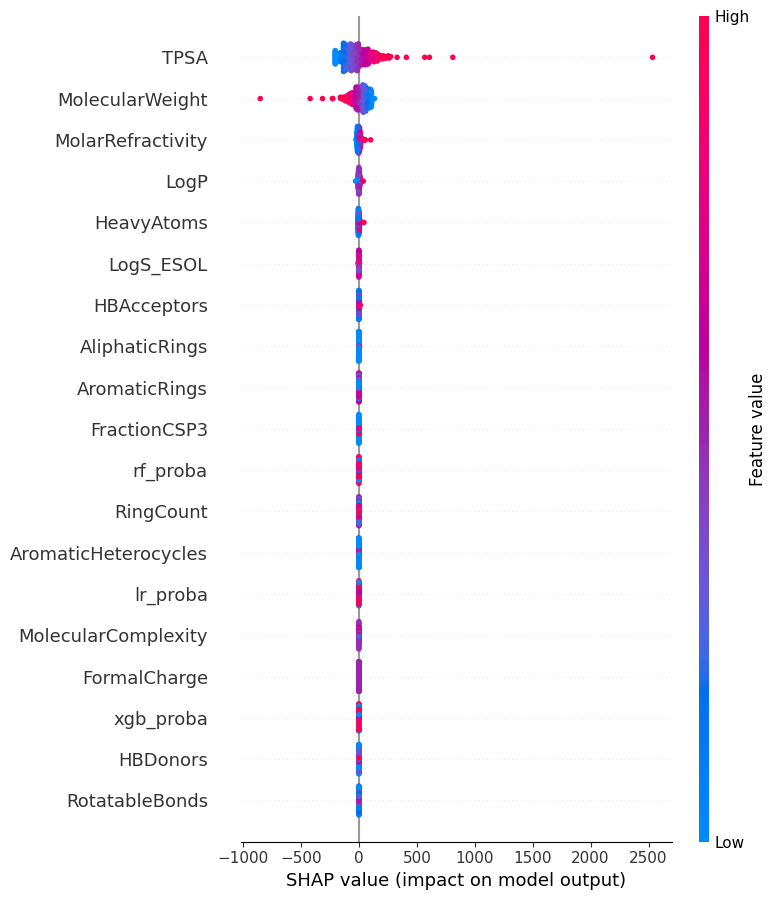

In [11]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if not isinstance(X_val, pd.DataFrame):
    X_val = pd.DataFrame(X_val, columns=features_df.columns)

base_outputs = [
    model.predict_proba(X_val)[:, 1].reshape(-1, 1)
    for name, model in stack_clf.named_estimators_.items()
]

base_features = pd.DataFrame(
    np.hstack(base_outputs),
    columns=[f"{name}_proba" for name in stack_clf.named_estimators_.keys()]
)

meta_input = pd.concat([X_val.reset_index(drop=True), base_features.reset_index(drop=True)], axis=1)

explainer = shap.Explainer(stack_clf.final_estimator_, meta_input)
shap_values = explainer(meta_input)

shap.summary_plot(shap_values, meta_input)


### Dumping into a .pkl File

In [12]:
import pickle

with open('../../Models/NR-AhR/lr_rf_xgb_stack.pkl', 'wb') as file:
    pickle.dump(model, file)

# Additional Models: SVC, GB, ET 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_val, y_train, y_val = train_test_split(
    features_df, target_df.values.ravel(),
    test_size=0.2, stratify=target_df, random_state=42
)

smoteen = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteen.fit_resample(X_train, y_train)


logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=10000, random_state=42))
])
logreg_params = {'clf__C': [0.1, 1, 10]}
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=5, scoring='roc_auc', n_jobs=1)
logreg_grid.fit(X_train_resampled, y_train_resampled)
best_logreg = logreg_grid.best_estimator_

rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=1)
rf_grid.fit(X_train_resampled, y_train_resampled)
best_rf = rf_grid.best_estimator_

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc', n_jobs=1)
xgb_grid.fit(X_train_resampled, y_train_resampled)
best_xgb = xgb_grid.best_estimator_

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True, random_state=42))
])
svc_params = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(svc_pipeline, svc_params, cv=5, scoring='roc_auc', n_jobs=1)
svc_grid.fit(X_train_resampled, y_train_resampled)
best_svc = svc_grid.best_estimator_

gb = GradientBoostingClassifier(random_state=42)
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='roc_auc', n_jobs=1)
gb_grid.fit(X_train_resampled, y_train_resampled)
best_gb = gb_grid.best_estimator_

et = ExtraTreesClassifier(random_state=42)
et_params = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
et_grid = GridSearchCV(et, et_params, cv=5, scoring='roc_auc', n_jobs=1)
et_grid.fit(X_train_resampled, y_train_resampled)
best_et = et_grid.best_estimator_

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])
knn_params = {'clf__n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='roc_auc', n_jobs=1)
knn_grid.fit(X_train_resampled, y_train_resampled)
best_knn = knn_grid.best_estimator_

base_learners = [
    ('lr', best_logreg),
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('svc', best_svc),
    ('gb', best_gb),
    ('et', best_et),
    ('knn', best_knn)
]

meta_learner = LogisticRegression(max_iter=10000, random_state=42)

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    passthrough=True,
    n_jobs=1
)

stacking_clf.fit(X_train_resampled, y_train_resampled)

y_pred_proba_stack = stacking_clf.predict_proba(X_val)[:, 1]
y_pred_stack = stacking_clf.predict(X_val)

stack_auc = roc_auc_score(y_val, y_pred_proba_stack)
print(f"\nStackingClassifier AUC: {stack_auc:.4f}")
print("StackingClassifier Classification Report:")
print(classification_report(y_val, y_pred_stack))


StackingClassifier AUC: 0.8184
StackingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.71       169
           1       0.70      0.82      0.76       169

    accuracy                           0.73       338
   macro avg       0.74      0.73      0.73       338
weighted avg       0.74      0.73      0.73       338



### SHAP predictions

In [21]:
import shap

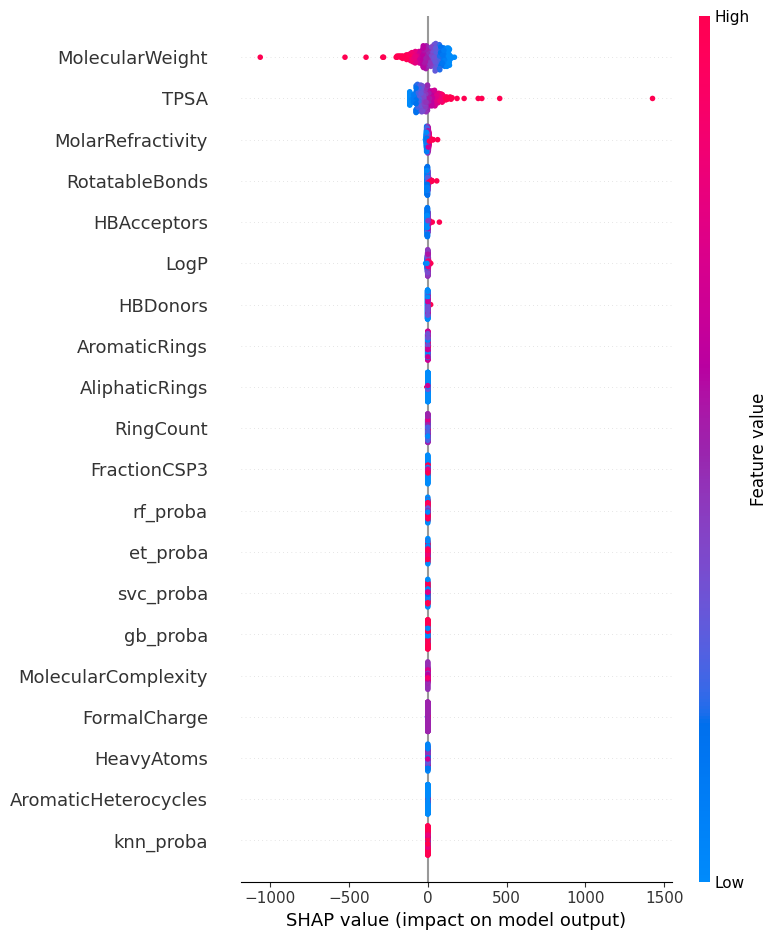

In [22]:
if not isinstance(X_val, pd.DataFrame):
    X_val = pd.DataFrame(X_val, columns=features_df.columns)

base_outputs = [
    model.predict_proba(X_val)[:, 1].reshape(-1, 1)
    for name, model in stacking_clf.named_estimators_.items()
]

base_features = pd.DataFrame(
    np.hstack(base_outputs),
    columns=[f"{name}_proba" for name in stacking_clf.named_estimators_.keys()]
)

meta_input = pd.concat([X_val.reset_index(drop=True), base_features.reset_index(drop=True)], axis=1)

explainer = shap.Explainer(stacking_clf.final_estimator_, meta_input)
shap_values = explainer(meta_input)

shap.summary_plot(shap_values, meta_input)

In [23]:
import pickle

with open('../../Models/NR-AhR/lr_rf_xgb_svc_gb_et_knn_stack.pkl', 'wb') as file:
    pickle.dump(model, file)